<a href="https://colab.research.google.com/github/jordanmsouza/TechChallenge_Fase1_Grupo4/blob/develop/Tech_Challange_Fase1_Grupo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Adicionando bibliotecas

In [363]:
import numpy as np #transformação dos dados
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Criando o Data Set

#### Referência base: https://www.kaggle.com/code/mragpavank/medical-cost-personal-datasets/input

In [364]:
dados = pd.read_csv("insurance_PT_BR.csv")
dados.head()

,idade,genero,imc,filhos,fumante,regiao,encargos
0,19,mulher,27.900,0,sim,sudoeste,16884.92400
1,18,homem,33.770,1,nao,sudeste,1725.55230
2,28,homem,33.000,3,nao,sudeste,4449.46200
3,33,homem,22.705,0,nao,noroeste,21984.47061
4,32,homem,28.880,0,nao,noroeste,3866.85520


### Verificando quantidade de linhas e colunas

In [365]:
dados.shape

(1338, 7)

### Verificando os tipos dos dados

In [366]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     1338 non-null   int64  
 1   genero    1338 non-null   object 
 2   imc       1338 non-null   float64
 3   filhos    1338 non-null   int64  
 4   fumante   1338 non-null   object 
 5   regiao    1338 non-null   object 
 6   encargos  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Verificando dados nulos

In [367]:
celulas_nulas = dados.isnull()
total_nulos_por_coluna = celulas_nulas.sum(axis=0)
total_nulos_por_coluna

idade       0
genero      0
imc         0
filhos      0
fumante     0
regiao      0
encargos    0
dtype: int64

### Análise Descritiva dos Dados Originais

In [368]:
print("Estatísticas Descritivas dos Dados Originais:")
print(dados.describe())

Estatísticas Descritivas dos Dados Originais:
             idade          imc       filhos      encargos
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


### Avaliando distribuição por genero

In [369]:
dados["genero"].value_counts()

genero
homem     676
mulher    662
Name: count, dtype: int64

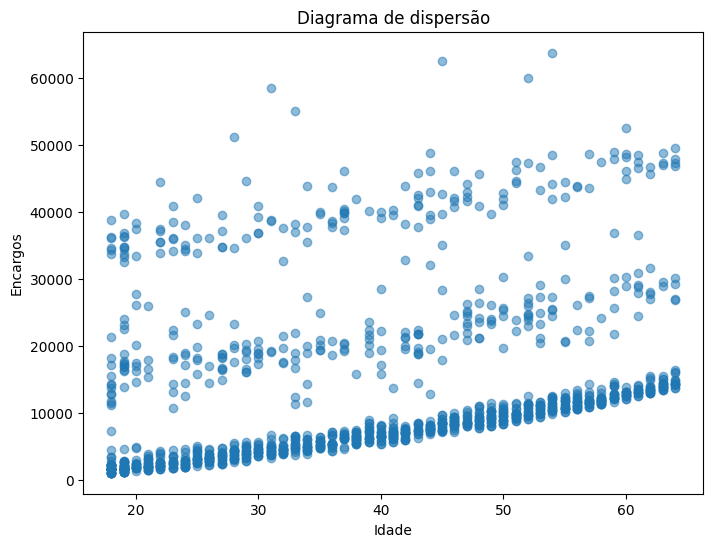

In [370]:
plt.figure(figsize=(8, 6))
plt.scatter(dados['idade'],dados['encargos'], alpha=0.5)
plt.xlabel('Idade')
plt.ylabel('Encargos')
plt.title('Diagrama de dispersão')
plt.show()

### Remoção dos outliers

In [371]:
index = dados[(dados['genero'] == 'homem') & (dados['encargos'] > 15000)].index
dados.drop(index, inplace=True)



In [372]:
index = dados[(dados['genero'] == 'mulher') & (dados['encargos'] > 15000)].index
dados.drop(index, inplace=True)

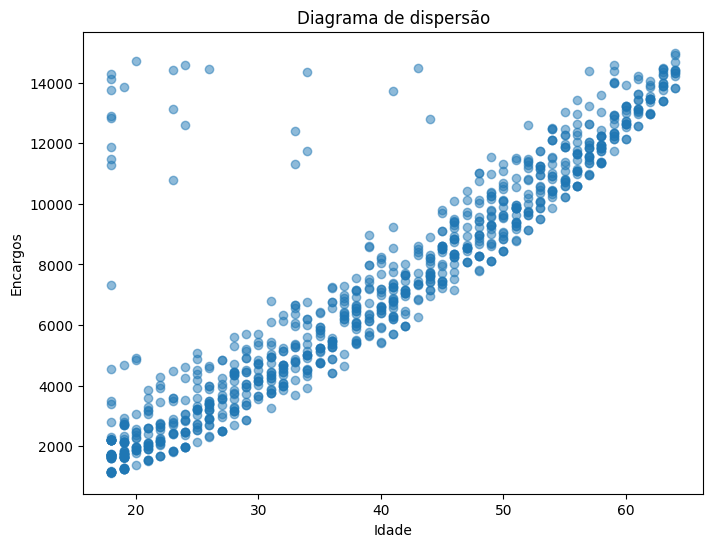

In [373]:
plt.figure(figsize=(8, 6))
plt.scatter(dados['idade'],dados['encargos'], alpha=0.5)
plt.xlabel('Idade')
plt.ylabel('Encargos')
plt.title('Diagrama de dispersão')
plt.show()

In [374]:
print("Estatísticas Descritivas dos Dados sem outliers:")
dados.describe()

Estatísticas Descritivas dos Dados sem outliers:


,idade,imc,filhos,encargos
count,980.000000,980.000000,980.000000,980.000000
mean,38.845918,30.492469,1.056122,7112.209423
std,13.984076,6.150983,1.211923,3869.930786
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.101250,0.000000,3701.622875
50%,39.000000,30.200000,1.000000,6789.108725
75%,51.000000,34.320000,2.000000,10411.043550
max,64.000000,53.130000,5.000000,14988.432000


### Gráficos de Distribuição

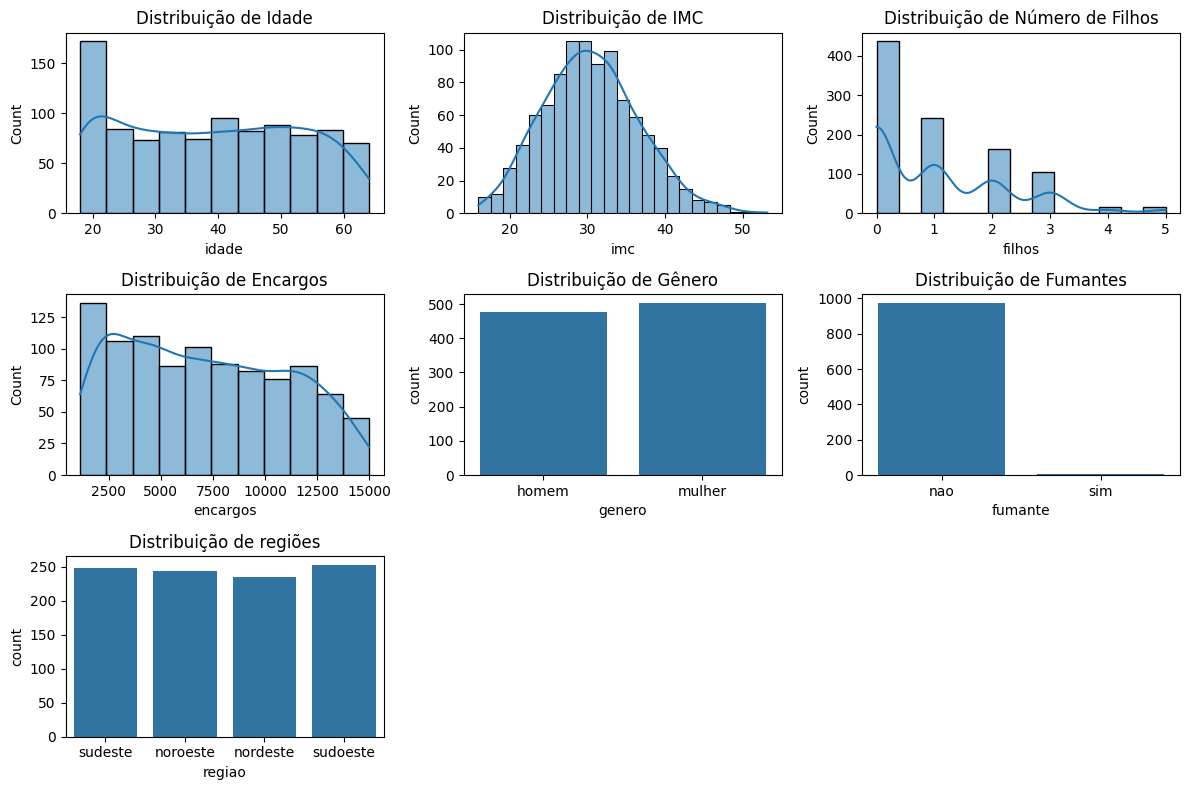

In [375]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 1)
sb.histplot(dados['idade'], kde=True)
plt.title('Distribuição de Idade')

plt.subplot(3, 3, 2)
sb.histplot(dados['imc'], kde=True)
plt.title('Distribuição de IMC')

plt.subplot(3, 3, 3)
sb.histplot(dados['filhos'], kde=True)
plt.title('Distribuição de Número de Filhos')

plt.subplot(3, 3, 4)
sb.histplot(dados['encargos'], kde=True)
plt.title('Distribuição de Encargos')

plt.subplot(3, 3, 5)
sb.countplot(x='genero', data=dados)
plt.title('Distribuição de Gênero')

plt.subplot(3, 3, 6)
sb.countplot(x='fumante', data=dados)
plt.title('Distribuição de Fumantes')

plt.subplot(3, 3, 7)
sb.countplot(x='regiao', data=dados)
plt.title('Distribuição de regiões')

plt.tight_layout()
plt.show()

## Normalizações e Padronizações

### Normalização Min-Max

In [376]:
#scaler_minmax = MinMaxScaler()
#dados_minmax = scaler_minmax.fit_transform(dados[['imc', 'encargos','idade','filhos']])
#dados[['imc', 'encargos','idade','filhos']] = dados_minmax

### Padronização LabelEcoder

In [377]:
label_enconder = LabelEncoder()

In [378]:
scaler_std = StandardScaler()
dados_std = scaler_std.fit_transform(dados[['imc', 'encargos','idade','filhos']])
dados_antigos = dados.copy(deep=True)
dados[['imc', 'encargos','idade','filhos']] = dados_std

dados["fumante"] = label_enconder.fit_transform(dados["fumante"])
dados["genero"] = label_enconder.fit_transform(dados["genero"])

df = pd.get_dummies(dados["regiao"], prefix = "dummy")
dados_coeded = pd.concat([dados, df], axis=1)
dados_coeded.drop(["regiao"], axis=1, inplace = True)



### Apresentando dados padronizados

In [379]:
dados_coeded.head()

,idade,genero,imc,filhos,fumante,encargos,dummy_nordeste,dummy_noroeste,dummy_sudeste,dummy_sudoeste
1,-1.491451,0,0.533119,-0.046332,0,-1.392637,False,False,True,False
2,-0.775987,0,0.407872,1.604780,0,-0.688412,False,False,True,False
4,-0.489801,0,-0.262282,-0.871889,0,-0.839036,False,True,False,False
5,-0.561347,1,-0.773030,-0.871889,0,-0.867535,False,False,True,False
6,0.511849,1,0.479441,-0.046332,0,0.291725,False,False,True,False


### Reapresentando dados antigos para comparação

In [380]:
dados_antigos.head()

,idade,genero,imc,filhos,fumante,regiao,encargos
1,18,homem,33.77,1,nao,sudeste,1725.5523
2,28,homem,33.00,3,nao,sudeste,4449.4620
4,32,homem,28.88,0,nao,noroeste,3866.8552
5,31,mulher,25.74,0,nao,sudeste,3756.6216
6,46,mulher,33.44,1,nao,sudeste,8240.5896


### Análise Comparativa Pré e Pós-Tratamento

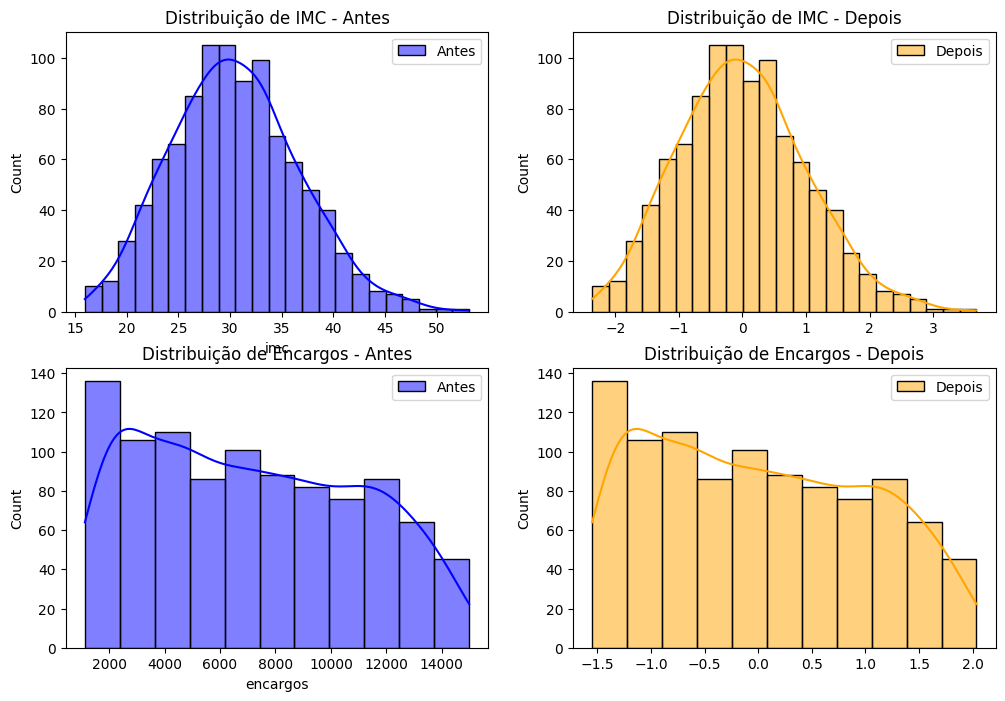

In [381]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sb.histplot(dados_antigos['imc'], kde=True, color='blue', label='Antes')
plt.title('Distribuição de IMC - Antes')
plt.legend();

plt.subplot(2, 2, 2)
sb.histplot(dados_std[:, 0], kde=True, color='orange', label='Depois')
plt.title('Distribuição de IMC - Depois')
plt.legend();

plt.subplot(2, 2, 3)
sb.histplot(dados_antigos['encargos'], kde=True, color='blue', label='Antes')
plt.title('Distribuição de Encargos - Antes')
plt.legend();

plt.subplot(2, 2, 4)
sb.histplot(dados_std[:, 1], kde=True, color='orange', label='Depois')
plt.title('Distribuição de Encargos - Depois')
plt.legend();

### Analisando correlações

In [382]:
matrix_correlacao = dados_coeded.corr()

In [383]:
matrix_correlacao["encargos"].sort_values(ascending=False)

encargos          1.000000
idade             0.896298
fumante           0.152432
filhos            0.136211
dummy_nordeste    0.083534
genero            0.079782
imc               0.073263
dummy_sudoeste    0.000794
dummy_noroeste    0.000645
dummy_sudeste    -0.083475
Name: encargos, dtype: float64

<Axes: xlabel='fumante', ylabel='encargos'>

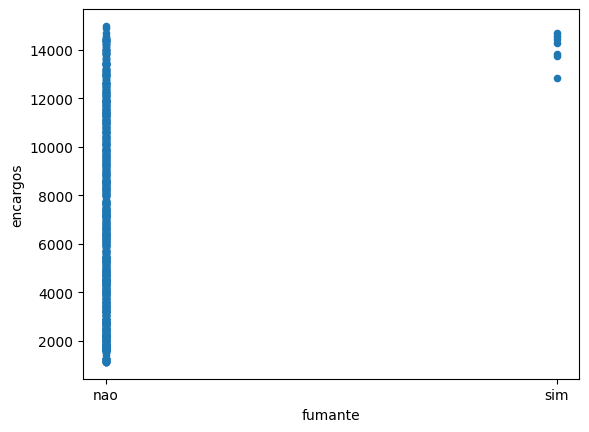

In [384]:
dados_antigos.plot.scatter(x = 'fumante', y = 'encargos')

### Analisando outliers

In [385]:

df_mulheres = dados_antigos[(dados_antigos['genero'] == 'mulher') & (dados_antigos['encargos'] > 30000)]
df_mulheres['encargos'].count()

0

In [386]:
df_homens = dados_antigos[(dados_antigos['genero'] == 'homem') & (dados_antigos['encargos'] > 40000)]
df_homens['encargos'].count()

0

<ipython-input-387-c2b6140ad60b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x="fumante",y="encargos", data=dados_antigos, palette="hls")


<Axes: xlabel='fumante', ylabel='encargos'>

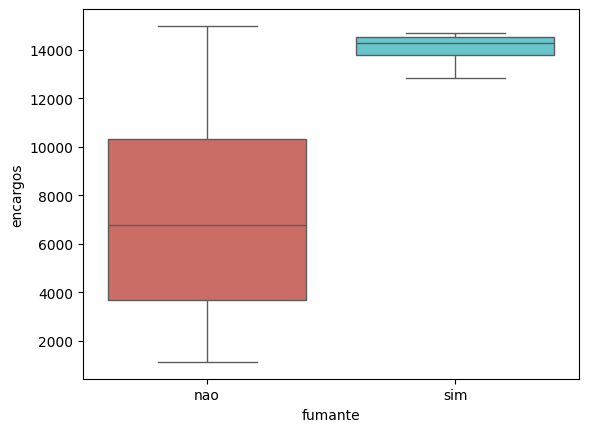

In [387]:
sb.boxplot(x="fumante",y="encargos", data=dados_antigos, palette="hls")

<Axes: xlabel='encargos'>

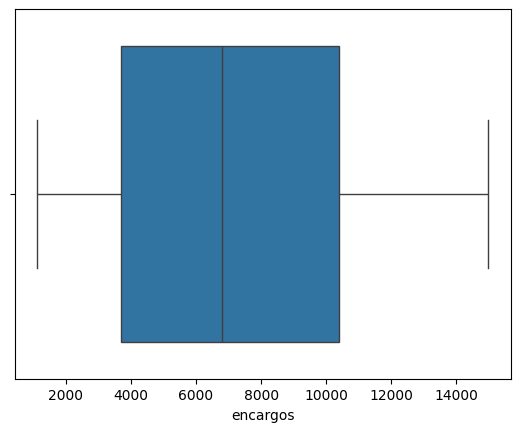

In [388]:
sb.boxplot(x=dados_antigos["encargos"])

<ipython-input-389-5105cc755aa3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x="genero",y="encargos", data=dados_antigos, palette="hls")


<Axes: xlabel='genero', ylabel='encargos'>

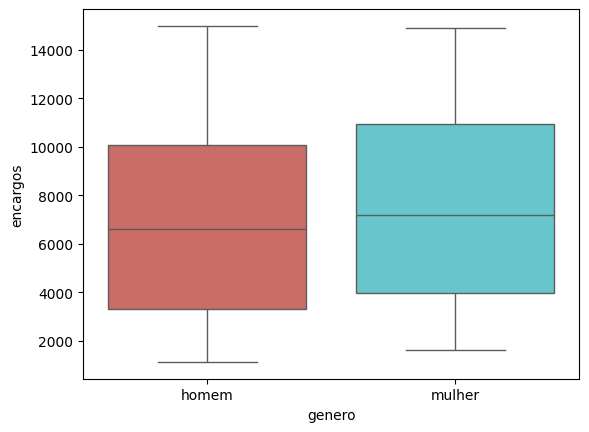

In [389]:
sb.boxplot(x="genero",y="encargos", data=dados_antigos, palette="hls")

<Axes: xlabel='idade'>

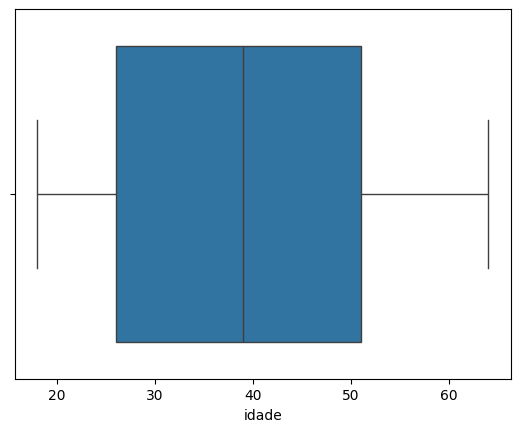

In [390]:
sb.boxplot(x=dados_antigos["idade"])

### Agrupando dados para entendimento de causualidade por regiao

In [391]:
dados_antigos.groupby('regiao').count()

,idade,genero,imc,filhos,fumante,encargos
regiao,,,,,,
nordeste,235,235,235,235,235,235
noroeste,244,244,244,244,244,244
sudeste,248,248,248,248,248,248
sudoeste,253,253,253,253,253,253


### Definindo a target.

In [392]:
x = dados_coeded.drop(columns=['encargos'])
y = dados_coeded["encargos"]

## Iniciando Validação Cruzada

### Aplicar validação cruzada k-fold

In [393]:
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [394]:
scores = cross_val_score(forest_model, x, y, cv=5, scoring='neg_mean_squared_error')

### Calcular a média dos scores de erro médio quadrático (MSE)

In [395]:
mean_mse = -scores.mean()
print("Média do Erro Médio Quadrático (MSE) utilizando Cross-Validation:", mean_mse)
print("Média do Erro Médio Quadrático (RMSE) utilizando Cross-Validation:", np.sqrt(mean_mse))

Média do Erro Médio Quadrático (MSE) utilizando Cross-Validation: 0.11491170375270916
Média do Erro Médio Quadrático (RMSE) utilizando Cross-Validation: 0.33898628844351386


### Divisão entre treino e teste

In [396]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Iniciando Modelo De Random Forest

### Estanciando Modelo

In [397]:
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

### Treinando modelo

In [398]:
forest_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

### Fazendo previsões nos dados de teste

In [399]:
y_pred_forest = forest_model.predict(x_test)

### Avaliar o desempenho do modelo

In [400]:
mse_forest =  mean_squared_error(y_test, y_pred_forest)
rmse_forest =  np.sqrt(mean_squared_error(y_test, y_pred_forest))
r2_forest = r2_score(y_test, y_pred_forest)
print("Erro médio quadrático (MSE) - Floresta Aleatória:", mse_forest)
print("Raiz do erro médio quadrático (RMSE) - Floresta Aleatória:", rmse_forest)
print("Coeficiente de determinação (R^2) - Floresta Aleatória:", r2_forest)

Erro médio quadrático (MSE) - Floresta Aleatória: 0.14624030234467644
Raiz do erro médio quadrático (RMSE) - Floresta Aleatória: 0.38241378419805483
Coeficiente de determinação (R^2) - Floresta Aleatória: 0.8521165707547526


### Análise do Desempenho do Modelo

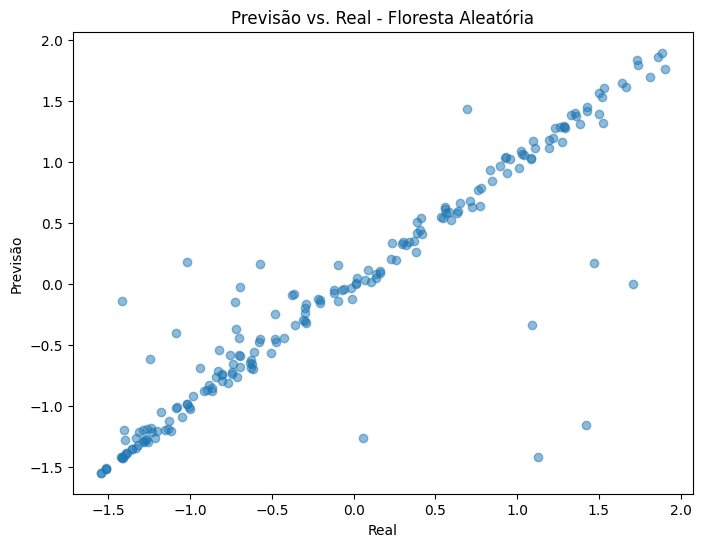

In [401]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_forest, alpha=0.5)
plt.xlabel('Real')
plt.ylabel('Previsão')
plt.title('Previsão vs. Real - Floresta Aleatória')
plt.show()

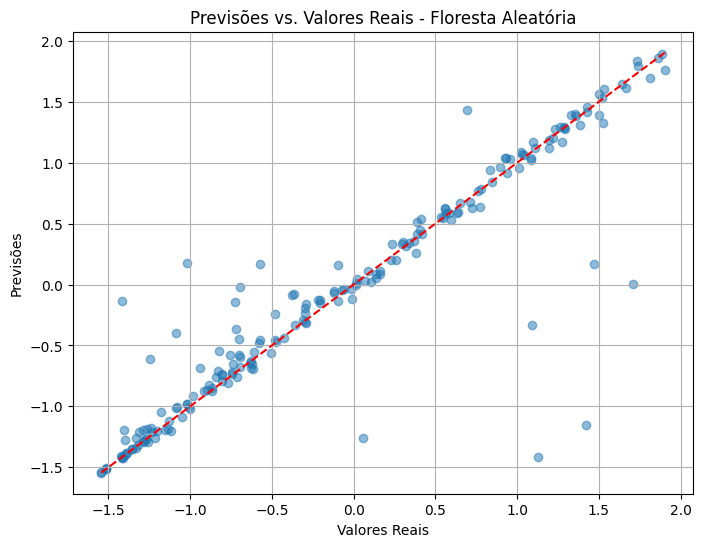

In [402]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_forest, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Linha diagonal para referência
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais - Floresta Aleatória')
plt.grid(True)
plt.show()

In [403]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [404]:
y_pred = model.predict(x_test)

In [405]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Erro médio quadrático (MSE):", mse)
print("Erro médio quadrático (RMSE):",np.sqrt(mse))
print("Coeficiente de determinação (R^2):", r2)

Erro médio quadrático (MSE): 0.12830115026134614
Erro médio quadrático (RMSE): 0.35819149942641876
Coeficiente de determinação (R^2): 0.8702572835767367


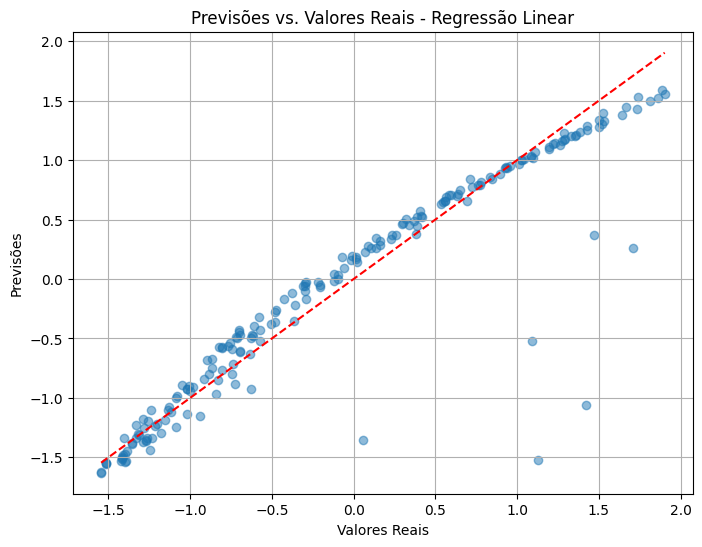

In [406]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Linha diagonal para referência
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais - Regressão Linear')
plt.grid(True)
plt.show()